In [10]:
import pandas as pd
import seaborn as sns
import numpy as np

In [11]:
df=pd.read_csv(r'diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: xlabel='Age', ylabel='BloodPressure'>

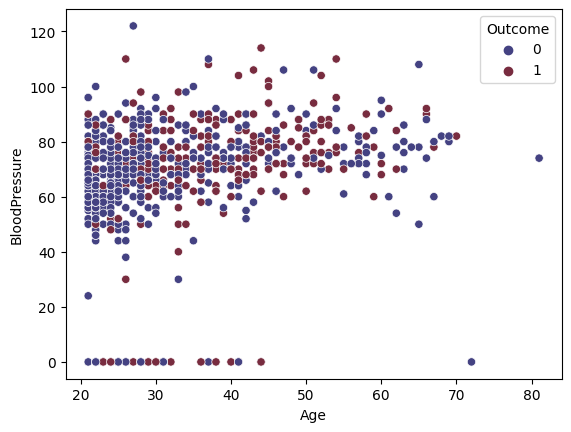

In [12]:
sns.scatterplot(x='Age',y='BloodPressure',hue='Outcome',palette='icefire',data=df)

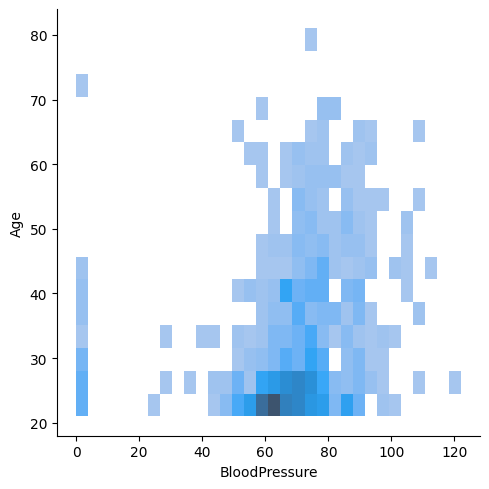

In [13]:
sns.displot(x='BloodPressure',y='Age',data=df)

<Axes: >

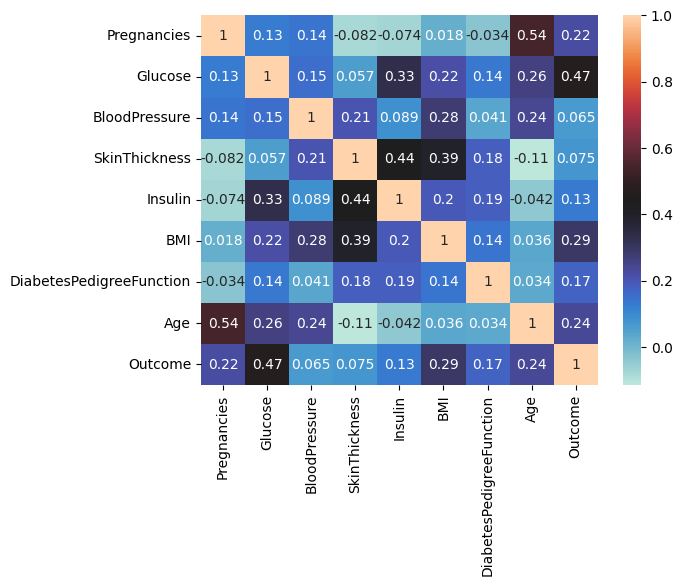

In [14]:
sns.heatmap(df.corr(),annot=True, cmap='icefire')

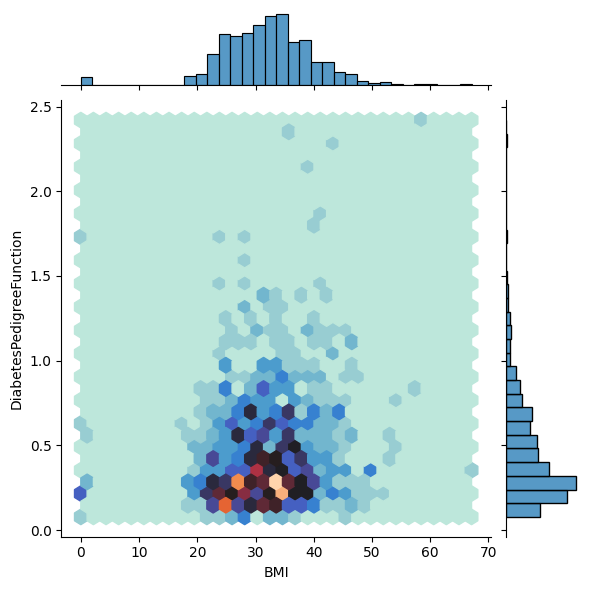

In [15]:
sns.jointplot(x='BMI',y='DiabetesPedigreeFunction',data=df,kind='hex',cmap='icefire')

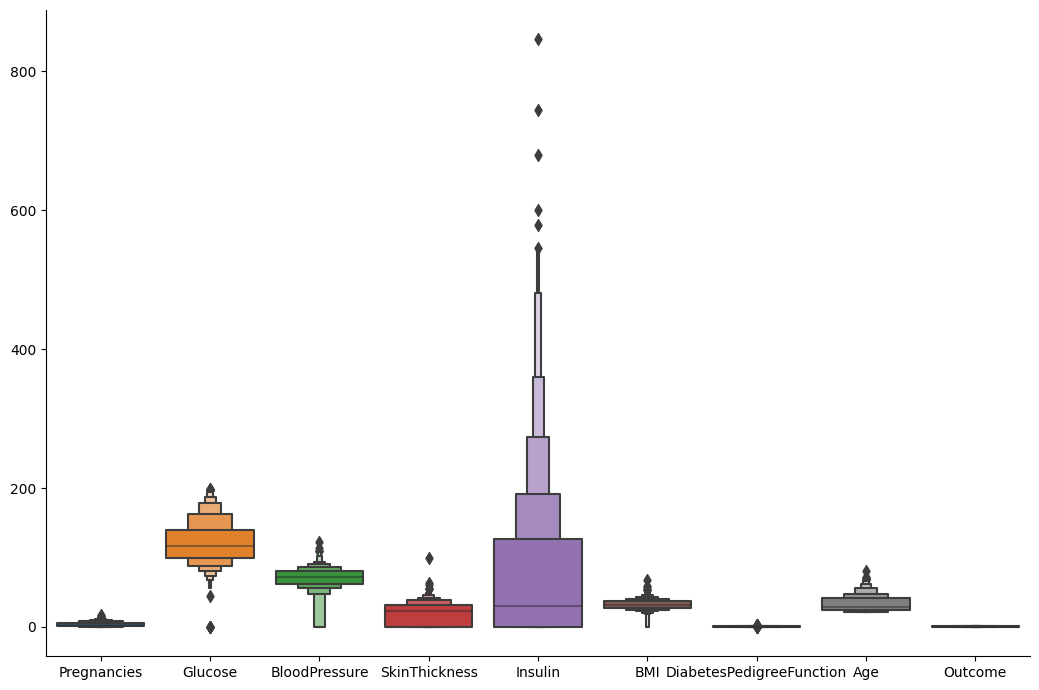

In [16]:
sns.catplot(data=df,kind='boxen', height=7,aspect=1.5)

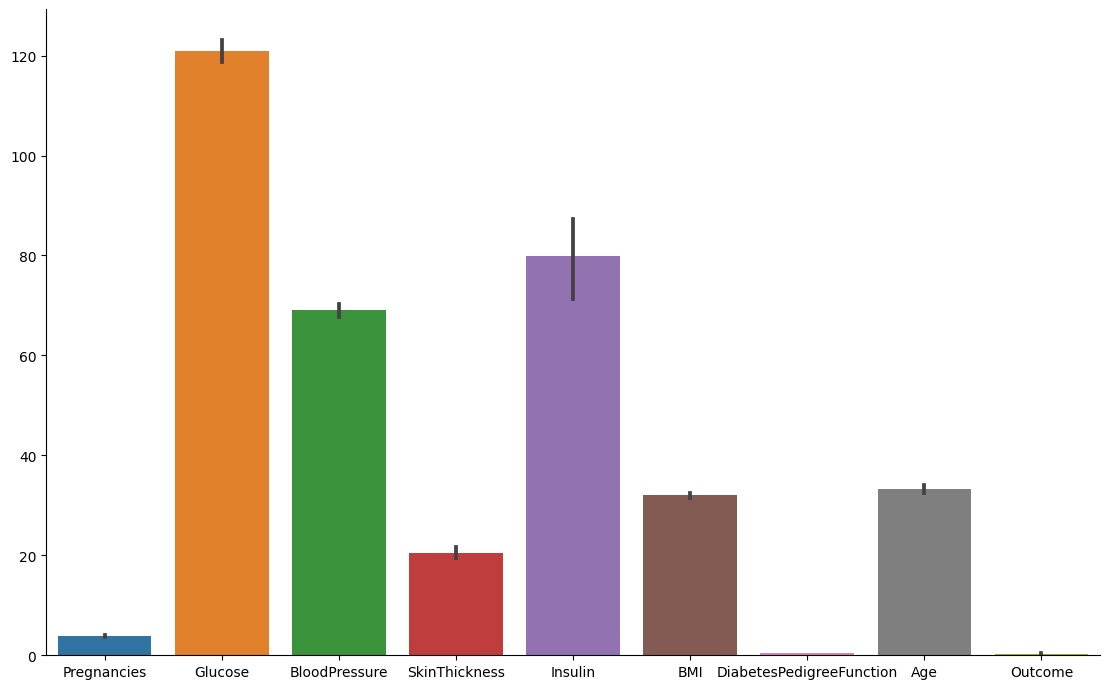

In [17]:
sns.catplot(data=df,kind='bar',height=7,aspect=1.6)

In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
df.filter(items=['Age','Outcome'])

,Age,Outcome
0,50,1
1,31,0
2,32,1
3,21,0
4,33,1
...,...,...
763,63,0
764,27,0
765,30,0
766,47,1


In [20]:
df.sort_values(by=['Age'],ascending=False).head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
459,9,134,74,33,60,25.9,0.460,81,0
453,2,119,0,0,0,19.6,0.832,72,0
666,4,145,82,18,0,32.5,0.235,70,1
123,5,132,80,0,0,26.8,0.186,69,0
684,5,136,82,0,0,0.0,0.640,69,0


In [21]:
X=df.drop(['Outcome'],axis='columns')
y=df['Outcome']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3)

In [23]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [24]:
lr.score(X_test,y_test)

0.2785958453455307

In [25]:
def get_score(model,X_train,X_test,y_train,y_test):
  model.fit(X_train,y_train)
  return model.score(X_test,y_test)

In [26]:
y_train

622    0
599    0
42     0
28     0
707    0
      ..
313    0
592    1
378    1
316    0
55     0
Name: Outcome, Length: 537, dtype: int64

In [27]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [28]:
get_score(SVC(),X_train,X_test,y_train,y_test)

0.70995670995671

In [29]:
get_score(RandomForestClassifier(),X_train,X_test,y_train,y_test)

0.7316017316017316

In [37]:
from sklearn.preprocessing import MinMaxScaler
model=MinMaxScaler

In [38]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

In [39]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(),X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([0.77272727, 0.74675325, 0.75974026, 0.81699346, 0.75163399])

In [47]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(SVC(gamma='auto'),
  {
      'C':[5,10,20],
      'kernel':['rbf','linear']},
      cv=5, return_train_score=False
)
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(gamma='auto'),
             param_grid={'C': [5, 10, 20], 'kernel': ['rbf', 'linear']})

In [50]:
new_df=pd.DataFrame(clf.cv_results_)
new_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013168,0.001174,0.003770,0.000051,5,rbf,"{'C': 5, 'kernel': 'rbf'}",0.675926,0.675926,0.682243,0.682243,0.682243,0.679716,0.003095,4
1,7.880664,2.172156,0.002335,0.000265,5,linear,"{'C': 5, 'kernel': 'linear'}",0.768519,0.712963,0.841121,0.747664,0.822430,0.778539,0.047322,3
2,0.012621,0.000194,0.003814,0.000035,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.675926,0.675926,0.682243,0.682243,0.682243,0.679716,0.003095,4
3,16.405752,2.892616,0.002480,0.000462,10,linear,"{'C': 10, 'kernel': 'linear'}",0.759259,0.722222,0.841121,0.747664,0.831776,0.780408,0.047392,2
4,0.018128,0.000457,0.005967,0.000314,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.675926,0.675926,0.682243,0.682243,0.682243,0.679716,0.003095,4
5,33.189516,13.051848,0.002312,0.000331,20,linear,"{'C': 20, 'kernel': 'linear'}",0.768519,0.722222,0.841121,0.757009,0.841121,0.785999,0.047519,1


In [51]:
new=new_df.filter(items=['param_C','param_kernel','mean_test_score'])

In [52]:
new

,param_C,param_kernel,mean_test_score
0,5,rbf,0.679716
1,5,linear,0.778539
2,10,rbf,0.679716
3,10,linear,0.780408
4,20,rbf,0.679716
5,20,linear,0.785999
